In [10]:
import sys
sys.path.append('../../scripts/')
import manage_files as mf
import plotting as pt
import matplotlib.pyplot as plt
import numpy as np

<H3>Import, plot and export timescales for peptides </H3>

In [4]:
output_path_relax="../../../relax_times_yamls/protein/averages/"            # folder to save spin relaxation times yaml files, 
                                      # defined above or redefine here 
output_path_timescales="../../../timescales_yamls/protein/averages/"  # folder to save timescale yaml files
                                      # defined above or redefine here

relaxation_yamls,timescales_yamls=mf.load_yaml_files(output_path_relax,output_path_timescales)

Spin relaxation data exist for:

   * eElab_micelle_40SDS_CHARMM_310K_Na_Neut_OPC_average
   * mag2_micelle_50SDS_CHARMM_310K_Na_Neut_OPC_average
   * hMff_micelle_40SDS_CHARMM_310K_Na_Neut_OPC
   * hMff_micelle_50SDS_CHARMM_310K_Na_Neut_OPC_average
   * hMff_micelle_50SDS_CHARMM_310K_Na_Neut_OPC
   * eYqJd_micelle_50SDS_CHARMM_310K_Na_Neut_OPC_average
   * hMff_micelle_60SDS_CHARMM_310K_Na_Neut_OPC
   * yFis1_micelle_50SDS_CHARMM_310K_Na_Neut_OPC_average2
   * eElab_micelle_50SDS_CHARMM_310K_Na_Neut_OPC_average
   * GWALP_dimer_micelle_70SDS_CHARMM_310K_Na_Neut_OPC_ordered
   * hMff_micelle_45SDS_CHARMM_310K_Na_Neut_OPC
   * GWALP_dimer_micelle_70SDS_CHARMM_310K_Na_Neut_OPC_disordered
   * yFis1_micelle_50SDS_CHARMM_310K_Na_Neut_OPC_average

 
Timescales exist for:

   * hMff_micelle_50SDS_CHARMM_310K_Na_Neut_OPC
   * hMff_micelle_40SDS_CHARMM_310K_Na_Neut_OPC
   * eElab_micelle_40SDS_CHARMM_310K_Na_Neut_OPC_average
   * mag2_micelle_50SDS_CHARMM_310K_Na_Neut_OPC_average
   * GWALP_di

In [18]:
merge=5 # number of consequent points to be merged (works on log scale!!)
ylim=[0,10**(-8)*1] # useful for observing details
#ylim=None # if None the whole range of available data is plotted
title="Timescales of of AA of peptides in SDS micelles"
xlabel="Residue of a peptide"
plot_output="timescales_peptides22_2024.pdf"
yscale="lin" #log/lin  logarithim/linear scale
units=10**9 # 1- seconds, 10**3 ms, 10**6 us, 10**9 ns ...
shift=0 # shift points for different systems in x-axis, multiplies of 0.15

aminoAcidsReplicas=[]
for system in timescales_yamls:
    if "average" in system:
        print(system)
        aminoAcidsReplicas.append(timescales_yamls[system]["analysis0"])

aminoAcidsReplicas.append(timescales_yamls["GWALP_dimer_micelle_70SDS_CHARMM_310K_Na_Neut_OPC_ordered"]["analysis0"])

labels=["eElab(TA)","eYqjD(TA)","yFis1(TA)","hMff(TA)","Mag 2","GWALP"] #must have at least the length as aminoAcids
aminoAcids=[aminoAcidsReplicas[0],aminoAcidsReplicas[3],aminoAcidsReplicas[5],aminoAcidsReplicas[4],aminoAcidsReplicas[1],aminoAcidsReplicas[7]]


eElab_micelle_40SDS_CHARMM_310K_Na_Neut_OPC_average
mag2_micelle_50SDS_CHARMM_310K_Na_Neut_OPC_average
yFis1_micelle_50SDS_CHARMM_310K_Na_Neut_OPC_average2
eYqJd_micelle_50SDS_CHARMM_310K_Na_Neut_OPC_average
hMff_micelle_50SDS_CHARMM_310K_Na_Neut_OPC_average
yFis1_micelle_50SDS_CHARMM_310K_Na_Neut_OPC_average
eElab_micelle_50SDS_CHARMM_310K_Na_Neut_OPC_average


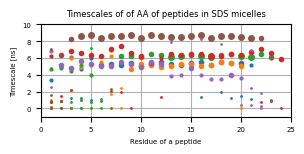

In [11]:
plt.rcParams["figure.figsize"] = [3, 1.5]
plt.rcParams["figure.autolayout"] = True
plt.rcParams.update({'font.size': 5})


fig, (ax1) = plt.subplots(1)

ax1.title.set_text(title)
    
uu=["[s]","[ms]","[us]","[ns]","[ps]","[fs]"]

unit=uu[int(np.log10(units)/3)]

ax1.grid()
if yscale=="log":
    ax1.set_yscale('log')
    
ax1.set_ylabel("Timescale "+unit)
    
max_len=0
for k,system in enumerate(aminoAcids):
    if k!=5:
        max_len=max(max_len,len(system["results"]["Coeff"]))
    else:
        max_len=max(max_len,len(system["results"]["Coeff"])//2)

    
#ax1.set_xlim(0,max_len+int(max_len//4))
ax1.set_xlim(0,max_len+1)
ax1.set_xlabel(xlabel)
    
colors=["C0","C1","C2","C3","C4","C5","C6","C7","C8","C9"]
markers=["o","v","s","*","P","D","p","X"]
    
nn=labels

merged_results={}

for k,system in enumerate(aminoAcids):
    
    merged_results[k]={}
    merged_results[k]['Coeffs']={}
    merged_results[k]['Ctimes']={}
    
    biggest_corr_time=np.log10(system["info"]['05_biggest_corr_time_[s]'])+12
    smallest_corr_time=np.log10(system["info"]['04_smallest_corr_time_[s]'])+12
    N_exp_to_fit=system["info"]['03_N_exp_to_fit']

    step_exp=(biggest_corr_time-smallest_corr_time)/N_exp_to_fit
    Ctimes = 10 ** np.arange(smallest_corr_time, biggest_corr_time, step_exp)
    Ctimes = Ctimes * 0.001 * 10 ** (-9);
    Ctimes_list=[Ctimes]

    for i in system["results"]["Coeff"]:
        Ctimes_list.append(system["results"]["Coeff"][i])
        
        Ctimes=np.array(Ctimes_list)
        Ctimes=np.transpose(Ctimes)
        
    ax1.set_ylim(Ctimes[0,0]/10*units,Ctimes[-1,0]*10*units)

    working_Ctimes=np.copy(Ctimes)

    if not ylim==None:
        ax1.set_ylim(ylim[0],ylim[1]*units)
            
            

        """Plot the timescales, user specifies the merge to be used.
        The merge works as follow: The code finds the first timescale with
        weight bigger bigger than 0 and merges with 'merge' subsequent timescales.
        The final result is plotted as a weighted average of the merged points."""

        
        
    for residue in range(1,working_Ctimes.shape[1]):
        merged_results[k]['Coeffs'][residue]=[]
        merged_results[k]['Ctimes'][residue]=[]
        timescale=0
        while timescale < working_Ctimes.shape[0]:
            #print("{} {} \n".format(i, j))
            if working_Ctimes[timescale,residue]>0:
                time_to_plot=working_Ctimes[timescale,0]
                total_weight=working_Ctimes[timescale,residue]
                if merge>1:
                    time_to_plot=0
                    total_weight=0
                    for i in range(0,merge):
                        try:
                            time_to_plot+=working_Ctimes[timescale+i,0]*working_Ctimes[timescale+i,residue]
                            total_weight+=working_Ctimes[timescale+i,residue]
                        except:
                            pass
                    time_to_plot/=total_weight
                
                ms=int(np.round(total_weight*4,0))
                #if k==0:
                #    ms=int(np.round(total_weight*12,0))

                if k!=5:
                    ax1.plot(residue+k*0.15*shift, time_to_plot*units, "o", markersize=ms, markeredgecolor=colors[k], markerfacecolor=colors[k])
                    
                elif residue<24:
                    ax1.plot(residue+k*0.15*shift, time_to_plot*units, "o", markersize=ms, markeredgecolor=colors[k], markerfacecolor=colors[k])
                
                merged_results[k]['Coeffs'][residue].append(total_weight)
                merged_results[k]['Ctimes'][residue].append(time_to_plot)
                timescale+=merge-1
            timescale+=1






        
       
    ax1.plot(residue+k*0.15*0, 100**4, "o", markersize=4, color=colors[k], label=nn[k])
        
#plt.axis('off')    
ax1.set_ylim(-1,)
#ax1.legend()
plt.savefig(plot_output)


In [35]:
#Export the numerical data
labels=["eElab","eYqjD","yFis1","hMff","Mag2","GWALP"] 
for i in range(len(labels)):
    save_name=f'export_simulation_data/{labels[i]}_timescales_peptides.dat'
    with open(save_name,'w') as f:
        f.write(f'# Peptide timescales for {labels[i]}\n')
        f.write(f'# All non-zero weights are listed in format:\n')
        f.write(f'# {"Timescale [s]":15s}{"Weight":>9}\n')
        f.write('\n')
        for res,data in aminoAcids[i]['results']['Coeff'].items():
            f.write(f'# Residue: {res+1}\n')
            for pos,weight in enumerate(data):
                if weight!=0:
                    f.write(f"{aminoAcids[i]['results']['Ctime'][pos]:>15.4e} {weight:>10.4f}\n")
            f.write('\n')


<H3>Import, plot and export timescales for SDS molecules </H3>

In [58]:
output_path_relax="../../../relax_times_yamls/SDS/average_over_SDS_over_replicas/"            # folder to save spin relaxation times yaml files, 
                                      # defined above or redefine here 
output_path_timescales="../../../timescales_yamls/SDS/average_over_SDS_over_replicas/"  # folder to save timescale yaml files
                                      # defined above or redefine here

relaxation_yamls,timescales_yamls=mf.load_yaml_files(output_path_relax,output_path_timescales)

Spin relaxation data exist for:

   * empty_60SDS_Na_DESAmber_TIP4P_293K_10fsSF_average
   * empty_60SDS_Na_DESAmber_TIP4P_307K_10fsSF_average
   * empty_60SDS_micelle_CHARMM36_OPC_10fsSF_307K_average
   * empty_60SDS_micelle_CHARMM36_TIP3P_10fsSF_average
   * hMff_micelle_50SDS_CHARMM_310K_Na_Neut_OPC
   * empty_60SDS_micelle_CHARMM36_TIP3P_10fsSF_307K_average
   * eElab_micelle_40SDS_CHARMM_310K_Na_Neut_OPC
   * eYqjD_micelle_50SDS_CHARMM_310K_Na_Neut_OPC
   * empty_60SDS_micelle_CHARMM36_OPC_10fsSF_293K_average
   * mag2_micelle_50SDS_CHARMM_310K_Na_Neut_OPC
   * GWALP_dimer_micelle_70SDS_CHARMM_310K_Na_Neut_OPC_ordered
   * yFis1_micelle_50SDS_CHARMM_310K_Na_Neut_OPC
   * GWALP_dimer_micelle_70SDS_CHARMM_310K_Na_Neut_OPC_disordered

 
Timescales exist for:

   * empty_60SDS_micelle_CHARMM36_OPC_10fsSF_293K_average
   * hMff_micelle_50SDS_CHARMM_310K_Na_Neut_OPC
   * GWALP_dimer_micelle_70SDS_CHARMM_310K_Na_Neut_OPC_disordered
   * empty_60SDS_micelle_CHARMM36_TIP3P_10fsSF_307K_aver

In [59]:
merge=5 # number of consequent points to be merged (works on log scale!!)
ylim=[0,10**(-9)*10] # useful for observing details
#ylim=None # if None the whole range of available data is plotted
title="Timescales of C-H bonds in SDS micelles with peptides"
xlabel="C-H bond"
plot_output="timescales_SDS_linear_2_2024.pdf"
yscale="lin" #log/lin  logarithim/linear scale
units=10**9 # 1- seconds, 10**3 ms, 10**6 us, 10**9 ns ...
shift=0.7 # shift points for different systems in x-axis, multiplies of 0.15

aminoAcidsReplicas=[]
for system in timescales_yamls:
    if 'empty' not in system:
        aminoAcidsReplicas.append(timescales_yamls[system]["analysis0"])
        print(system)

labels=["eElab","eYqjD","yFis1","hMff","Mag 2","GWALP"] #must have same dimention as aminoAcids
aminoAcids=[aminoAcidsReplicas[6],aminoAcidsReplicas[2],aminoAcidsReplicas[3],aminoAcidsReplicas[0],aminoAcidsReplicas[4],aminoAcidsReplicas[5]]


hMff_micelle_50SDS_CHARMM_310K_Na_Neut_OPC
GWALP_dimer_micelle_70SDS_CHARMM_310K_Na_Neut_OPC_disordered
eYqjD_micelle_50SDS_CHARMM_310K_Na_Neut_OPC
yFis1_micelle_50SDS_CHARMM_310K_Na_Neut_OPC
mag2_micelle_50SDS_CHARMM_310K_Na_Neut_OPC
GWALP_dimer_micelle_70SDS_CHARMM_310K_Na_Neut_OPC_ordered
eElab_micelle_40SDS_CHARMM_310K_Na_Neut_OPC


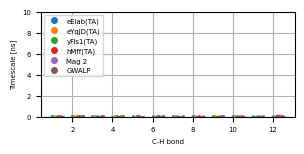

In [60]:
plt.rcParams["figure.figsize"] = [3, 1.5]
plt.rcParams["figure.autolayout"] = True
plt.rcParams.update({'font.size': 5})

yscale="lin"
fig, (ax1) = plt.subplots(1)

#ax1.title.set_text(title)
    
uu=["[s]","[ms]","[us]","[ns]","[ps]","[fs]"]

unit=uu[int(np.log10(units)/3)]

    
ax1.grid()
if yscale=="log":
    ax1.set_yscale('log')
    
ax1.set_ylabel("Timescale "+unit)
    
max_len=0
for system in aminoAcids:
    max_len=max(max_len,len(system["results"]["Coeff"]))
       

    
#ax1.set_xlim(0,max_len+int(max_len//4))
#ax1.set_xlim(0,max_len)
ax1.set_xlabel(xlabel)
    
colors=["C0","C1","C2","C3","C4","C5","C6","C7","C8","C9"]
markers=["o","v","s","*","P","D","p","X"]

labels=["eElab(TA)","eYqjD(TA)","yFis1(TA)","hMff(TA)","Mag 2","GWALP"] 
nn=labels
for k,system in enumerate(aminoAcids):
        
    biggest_corr_time=np.log10(system["info"]['05_biggest_corr_time_[s]'])+12
    smallest_corr_time=np.log10(system["info"]['04_smallest_corr_time_[s]'])+12
    N_exp_to_fit=system["info"]['03_N_exp_to_fit']

    step_exp=(biggest_corr_time-smallest_corr_time)/N_exp_to_fit
    Ctimes = 10 ** np.arange(smallest_corr_time, biggest_corr_time, step_exp)
    Ctimes = Ctimes * 0.001 * 10 ** (-9);
    Ctimes_list=[Ctimes]

    for i in system["results"]["Coeff"]:
        Ctimes_list.append(system["results"]["Coeff"][i])
        
        Ctimes=np.array(Ctimes_list)
        Ctimes=np.transpose(Ctimes)
        
    ax1.set_ylim(Ctimes[0,0]/10*units,Ctimes[-1,0]*10*units)

    working_Ctimes=np.copy(Ctimes)

    if not ylim==None:
        ax1.set_ylim(ylim[0],ylim[1]*units)
            
            

        """Plot the timescales, user specifies the merge to be used.
        The merge works as follow: The code finds the first timescale with
        weight bigger bigger than 0 and merges with 'merge' subsequent timescales.
        The final result is plotted as a weighted average of the merged points."""

        
        
    for residue in range(1,working_Ctimes.shape[1]):
        timescale=0
        while timescale < working_Ctimes.shape[0]:
            #print("{} {} \n".format(i, j))
            if working_Ctimes[timescale,residue]>0:
                time_to_plot=working_Ctimes[timescale,0]
                total_weight=working_Ctimes[timescale,residue]
                if merge>1:
                    time_to_plot=0
                    total_weight=0
                    for i in range(0,merge):
                        try:
                            time_to_plot+=working_Ctimes[timescale+i,0]*working_Ctimes[timescale+i,residue]
                            total_weight+=working_Ctimes[timescale+i,residue]
                        except:
                            pass
                    time_to_plot/=total_weight
                
                ms=int(np.round(total_weight*4,0))


                ax1.plot(residue+k*0.15*shift, time_to_plot*units, "o", markersize=ms, markeredgecolor=colors[k], markerfacecolor=colors[k])
                    
                timescale+=merge-1
            timescale+=1






        
       
    ax1.plot(residue+k*0.15*0, 100**4, "o", markersize=4, color=colors[k], label=nn[k])
        
          
ax1.legend(loc=2)
plt.savefig(plot_output)


/tmp/ipykernel_371730/989057109.py:69: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax1.set_ylim(ylim[0],ylim[1]*units)


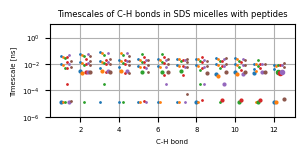

In [61]:
merge=5 # number of consequent points to be merged (works on log scale!!)
ylim=[0,10**(-9)*10] # useful for observing details
#ylim=None # if None the whole range of available data is plotted
title="Timescales of C-H bonds in SDS micelles with peptides"
xlabel="C-H bond"
plot_output="timescales_SDS_log_2024.pdf"
yscale="log" #log/lin  logarithim/linear scale
units=10**9 # 1- seconds, 10**3 ms, 10**6 us, 10**9 ns ...
shift=0.7 # shift points for different systems in x-axis, multiplies of 0.15



plt.rcParams["figure.figsize"] = [3, 1.5]
plt.rcParams["figure.autolayout"] = True
plt.rcParams.update({'font.size': 5})


fig, (ax1) = plt.subplots(1)

ax1.title.set_text(title)
    
uu=["[s]","[ms]","[us]","[ns]","[ps]","[fs]"]

unit=uu[int(np.log10(units)/3)]

    
ax1.grid()
if yscale=="log":
    ax1.set_yscale('log')
    
ax1.set_ylabel("Timescale "+unit)
    
max_len=0
for system in aminoAcids:
    max_len=max(max_len,len(system["results"]["Coeff"]))
       

    
#ax1.set_xlim(0,max_len+int(max_len//2))
#ax1.set_xlim(0,max_len)
ax1.set_xlabel(xlabel)
    
colors=["C0","C1","C2","C3","C4","C5","C6","C7","C8","C9"]
markers=["o","v","s","*","P","D","p","X"]
    
nn=labels
for k,system in enumerate(aminoAcids):
        
    biggest_corr_time=np.log10(system["info"]['05_biggest_corr_time_[s]'])+12
    smallest_corr_time=np.log10(system["info"]['04_smallest_corr_time_[s]'])+12
    N_exp_to_fit=system["info"]['03_N_exp_to_fit']

    step_exp=(biggest_corr_time-smallest_corr_time)/N_exp_to_fit
    Ctimes = 10 ** np.arange(smallest_corr_time, biggest_corr_time, step_exp)
    Ctimes = Ctimes * 0.001 * 10 ** (-9);
    Ctimes_list=[Ctimes]

    for i in system["results"]["Coeff"]:
        Ctimes_list.append(system["results"]["Coeff"][i])
        
        Ctimes=np.array(Ctimes_list)
        Ctimes=np.transpose(Ctimes)
        
    ax1.set_ylim(Ctimes[0,0]/10*units,Ctimes[-1,0]*10*units)

    working_Ctimes=np.copy(Ctimes)

    if not ylim==None:
        ax1.set_ylim(ylim[0],ylim[1]*units)
            
            

        """Plot the timescales, user specifies the merge to be used.
        The merge works as follow: The code finds the first timescale with
        weight bigger bigger than 0 and merges with 'merge' subsequent timescales.
        The final result is plotted as a weighted average of the merged points."""

        
        
    for residue in range(1,working_Ctimes.shape[1]):
        timescale=0
        while timescale < working_Ctimes.shape[0]:
            #print("{} {} \n".format(i, j))
            if working_Ctimes[timescale,residue]>0:
                time_to_plot=working_Ctimes[timescale,0]
                total_weight=working_Ctimes[timescale,residue]
                if merge>1:
                    time_to_plot=0
                    total_weight=0
                    for i in range(0,merge):
                        try:
                            time_to_plot+=working_Ctimes[timescale+i,0]*working_Ctimes[timescale+i,residue]
                            total_weight+=working_Ctimes[timescale+i,residue]
                        except:
                            pass
                    time_to_plot/=total_weight
                
                ms=int(np.round(total_weight*4,0))


                ax1.plot(residue+k*0.15*shift, time_to_plot*units, "o", markersize=ms, markeredgecolor=colors[k], markerfacecolor=colors[k])
                    
                timescale+=merge-1
            timescale+=1






        
       
    ax1.plot(residue+k*0.15*0, 100**4, "o", markersize=4, color=colors[k], label=nn[k])
        
          
#ax1.legend(loc=4, ncol=2)
plt.savefig(plot_output)


In [63]:
#Export the numerical data
labels=["eElab","eYqjD","yFis1","hMff","Mag2","GWALP"] 
for i in range(len(labels)):
    save_name=f'export_simulation_data/{labels[i]}_timescales_SDS.dat'
    with open(save_name,'w') as f:
        f.write(f'# SDS molecules timescales for micelle with {labels[i]} peptide \n')
        f.write(f'# All non-zero weights are listed in format:\n')
        f.write(f'# {"Timescale [s]":15s}{"Weight":>9}\n')
        f.write('\n')
        for res,data in aminoAcids[i]['results']['Coeff'].items():
            f.write(f'# CH bond number: {res+1}\n')
            for pos,weight in enumerate(data):
                if weight!=0:
                    f.write(f"{aminoAcids[i]['results']['Ctime'][pos]:>15.4e} {weight:>10.4f}\n")
            f.write('\n')

In [45]:
for key,data in timescales_yamls.items():
    Ctimes=data['analysis0']['results']['Ctime']
    #print(data['analysis0']['results']['Coeff'])
    if 'average' in key or 'GWALP' in key:
        dominant_time=[]
        for residue,Coeff in data['analysis0']['results']['Coeff'].items():
            if 'mag' in key:
                if residue<12 and residue>3:
                    dominant_time.append(Ctimes[np.argmax(Coeff)])
            elif residue>3:
                dominant_time.append(Ctimes[np.argmax(Coeff)])
        print(f'{key}: {min(dominant_time)*10**9:.2f} {max(dominant_time)*10**9:.2f} {np.mean(dominant_time)*10**9:.2f}')

eElab_micelle_40SDS_CHARMM_310K_Na_Neut_OPC_average: 5.01 6.31 5.38
mag2_micelle_50SDS_CHARMM_310K_Na_Neut_OPC_average: 5.01 5.62 5.24
GWALP_dimer_micelle_70SDS_CHARMM_310K_Na_Neut_OPC_disordered: 6.31 8.91 7.80
yFis1_micelle_50SDS_CHARMM_310K_Na_Neut_OPC_average2: 3.98 7.08 6.12
eYqJd_micelle_50SDS_CHARMM_310K_Na_Neut_OPC_average: 4.47 6.31 5.25
hMff_micelle_50SDS_CHARMM_310K_Na_Neut_OPC_average: 5.62 7.08 6.32
yFis1_micelle_50SDS_CHARMM_310K_Na_Neut_OPC_average: 3.98 7.08 6.16
eElab_micelle_50SDS_CHARMM_310K_Na_Neut_OPC_average: 3.55 5.62 5.50
GWALP_dimer_micelle_70SDS_CHARMM_310K_Na_Neut_OPC_ordered: 5.62 8.91 8.55


In [46]:
for key,data in timescales_yamls.items():
    Ctimes=data['analysis0']['results']['Ctime']
    #print(data['analysis0']['results']['Coeff'])
    if 'average' in key or 'GWALP' in key:
        dominant_time=[]
        for residue,Coeff in data['analysis0']['results']['Coeff'].items():
            if Coeff[np.argmax(Coeff)]>0.6:
                dominant_time.append(Ctimes[np.argmax(Coeff)])
        print(len(dominant_time))
        print(f'{key}: {min(dominant_time)*10**9:.2f} {max(dominant_time)*10**9:.2f} {np.mean(dominant_time)*10**9:.2f}')

6
eElab_micelle_40SDS_CHARMM_310K_Na_Neut_OPC_average: 5.01 5.62 5.32
7
mag2_micelle_50SDS_CHARMM_310K_Na_Neut_OPC_average: 3.98 5.62 5.13
25
GWALP_dimer_micelle_70SDS_CHARMM_310K_Na_Neut_OPC_disordered: 6.31 7.94 7.78
16
yFis1_micelle_50SDS_CHARMM_310K_Na_Neut_OPC_average2: 5.01 6.31 6.23
5
eYqJd_micelle_50SDS_CHARMM_310K_Na_Neut_OPC_average: 5.01 5.01 5.01
14
hMff_micelle_50SDS_CHARMM_310K_Na_Neut_OPC_average: 6.31 7.08 6.42
15
yFis1_micelle_50SDS_CHARMM_310K_Na_Neut_OPC_average: 6.31 6.31 6.31
10
eElab_micelle_50SDS_CHARMM_310K_Na_Neut_OPC_average: 5.62 5.62 5.62
27
GWALP_dimer_micelle_70SDS_CHARMM_310K_Na_Neut_OPC_ordered: 8.91 8.91 8.91


In [75]:
for i,data in merged_results.items():
    dominant_time=[]
    for residue,Coeff in data['Coeffs'].items():
        if Coeff[np.argmax(Coeff)]>0.75:
            dominant_time.append(data['Ctimes'][residue][np.argmax(Coeff)])

    #print(dominant_time)
    print(f' {min(dominant_time)*10**9:.2f} {max(dominant_time)*10**9:.2f} {np.mean(dominant_time)*10**9:.2f}')

 5.06 5.56 5.29
 4.71 5.29 5.10
 6.08 6.46 6.26
 6.19 6.69 6.39
 4.90 5.61 5.27
 8.31 8.76 8.59
